# **Exercise 2.4: Evaluating Hyperparameters. RandomForest**

## 1. Import Libraries and Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [4]:
path = r'C:\Users\Nuria Miquel\Desktop\nuria\Machine Learning'

In [5]:
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'weather_cleaned2.csv'), index_col = False)

In [6]:
df.head()

DATE  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  19600101                  7            0.85           1.018   
1  19600102                  6            0.84           1.018   
2  19600103                  8            0.90           1.018   
3  19600104                  3            0.92           1.018   
4  19600105                  6            0.95           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   
1                    0.36                 1.05             1.1   
2                    0.18                 0.30             0.0   
3                    0.58                 0.00             4.1   
4                    0.65                 0.14             5.4   

   BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  ...  STOCKHOLM_temp_max  \
0              6.5             0.8            10.9  ...                 4.9   
1              6.1             3.3            10.1  ...                 5.0   
2              8.5             5.1             9.9  ...                 4.1   
3              6.3             3.8            10.6  ...                 2.3   
4              3.0            -0.7             6.0  ...                 4.3   

   VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                     5               0.88             1.0003   
1                     7               0.91             1.0007   
2                     7               0.91             1.0096   
3                     7               0.86             1.0184   
4                     3               0.80             1.0328   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                       0.45                    0.34                4.7   
1                       0.25                    0.84                0.7   
2                       0.17                    0.08                0.1   
3                       0.13                    0.98                0.0   
4                       0.46                    0.00                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 136 columns]

In [7]:
pleasant = pd.read_csv(os.path.join(path, 'Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [8]:
pleasant.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

## 2. Data Wrangling

**Reducing to the 2000s decade**

In [11]:
decade = df[df['DATE'].astype(str).str.startswith('200')] 

In [12]:
decade.shape

(3653, 136)

In [13]:
pleasant_decade = pleasant[pleasant['DATE'].astype(str).str.startswith('200')] 

In [14]:
pleasant_decade.shape

(3653, 16)

**Creating a list for the unique station names**

In [16]:
stations = [col.split('_')[0] for col in decade.columns if '_' in col]

In [17]:
unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [18]:
stations_list = list(unique_stations)

**Dropping unnecessary columns**

In [20]:
decade.drop('DATE', axis = 1, inplace = True)

C:\Users\Nuria Miquel\AppData\Local\Temp\ipykernel_15308\844660690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade.drop('DATE', axis = 1, inplace = True)


In [21]:
pleasant_decade.drop('DATE', axis = 1, inplace = True)

C:\Users\Nuria Miquel\AppData\Local\Temp\ipykernel_15308\1631370846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pleasant_decade.drop('DATE', axis = 1, inplace = True)


## 3. Reshaping

In [23]:
X = decade

In [24]:
y = pleasant_decade

In [25]:
X = np.array(X)
y = np.array(y)

In [26]:
print(X.shape)
print(y.shape)

(3653, 135)
(3653, 15)


## 4. Data Split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [29]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(914, 135) (914, 15)


## 5. Hyperparameter Testing

In [31]:
clf = RandomForestClassifier()

In [32]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,10],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [33]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


C:\Users\Nuria Miquel\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Nuria Miquel\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nuria Miquel\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Nuria Miquel\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Nu

Search took 4.434336121877035 minutes


In [59]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
Best GRID search score is: 0.5414384811975174


### Random Model

In [52]:
rs_space = {
    'max_depth': list(np.arange(10, 100, step=10)) + [None],
    'n_estimators': np.arange(150, 250, step=25),  # Focusing on around the best n_estimators
    'max_features': randint(30, 70),  # Adjusting to a narrower range based on grid search
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': randint(1, 4), 
    'min_samples_split': np.arange(2, 10, step=2) 
}

In [54]:
clf2= RandomForestClassifier()

In [56]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=10, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Search took 6.1612069487571715 minutes


In [58]:
# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 70, 'max_features': 43, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 225}
Best RANDOM search score is: 0.6202993793355239


## 6. Running RandomForest with Optimized Parameters

In [61]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

NameError: name 'model_grid' is not defined

In [63]:
# creating a RF classifier with the best results from above
clf3 = RandomForestClassifier(n_estimators = 200, max_depth=None, max_features=10, min_samples_leaf=1, min_samples_split=3, criterion = 'gini')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_features=10, min_samples_split=3, n_estimators=200)

In [65]:
# performing predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.5809628008752735


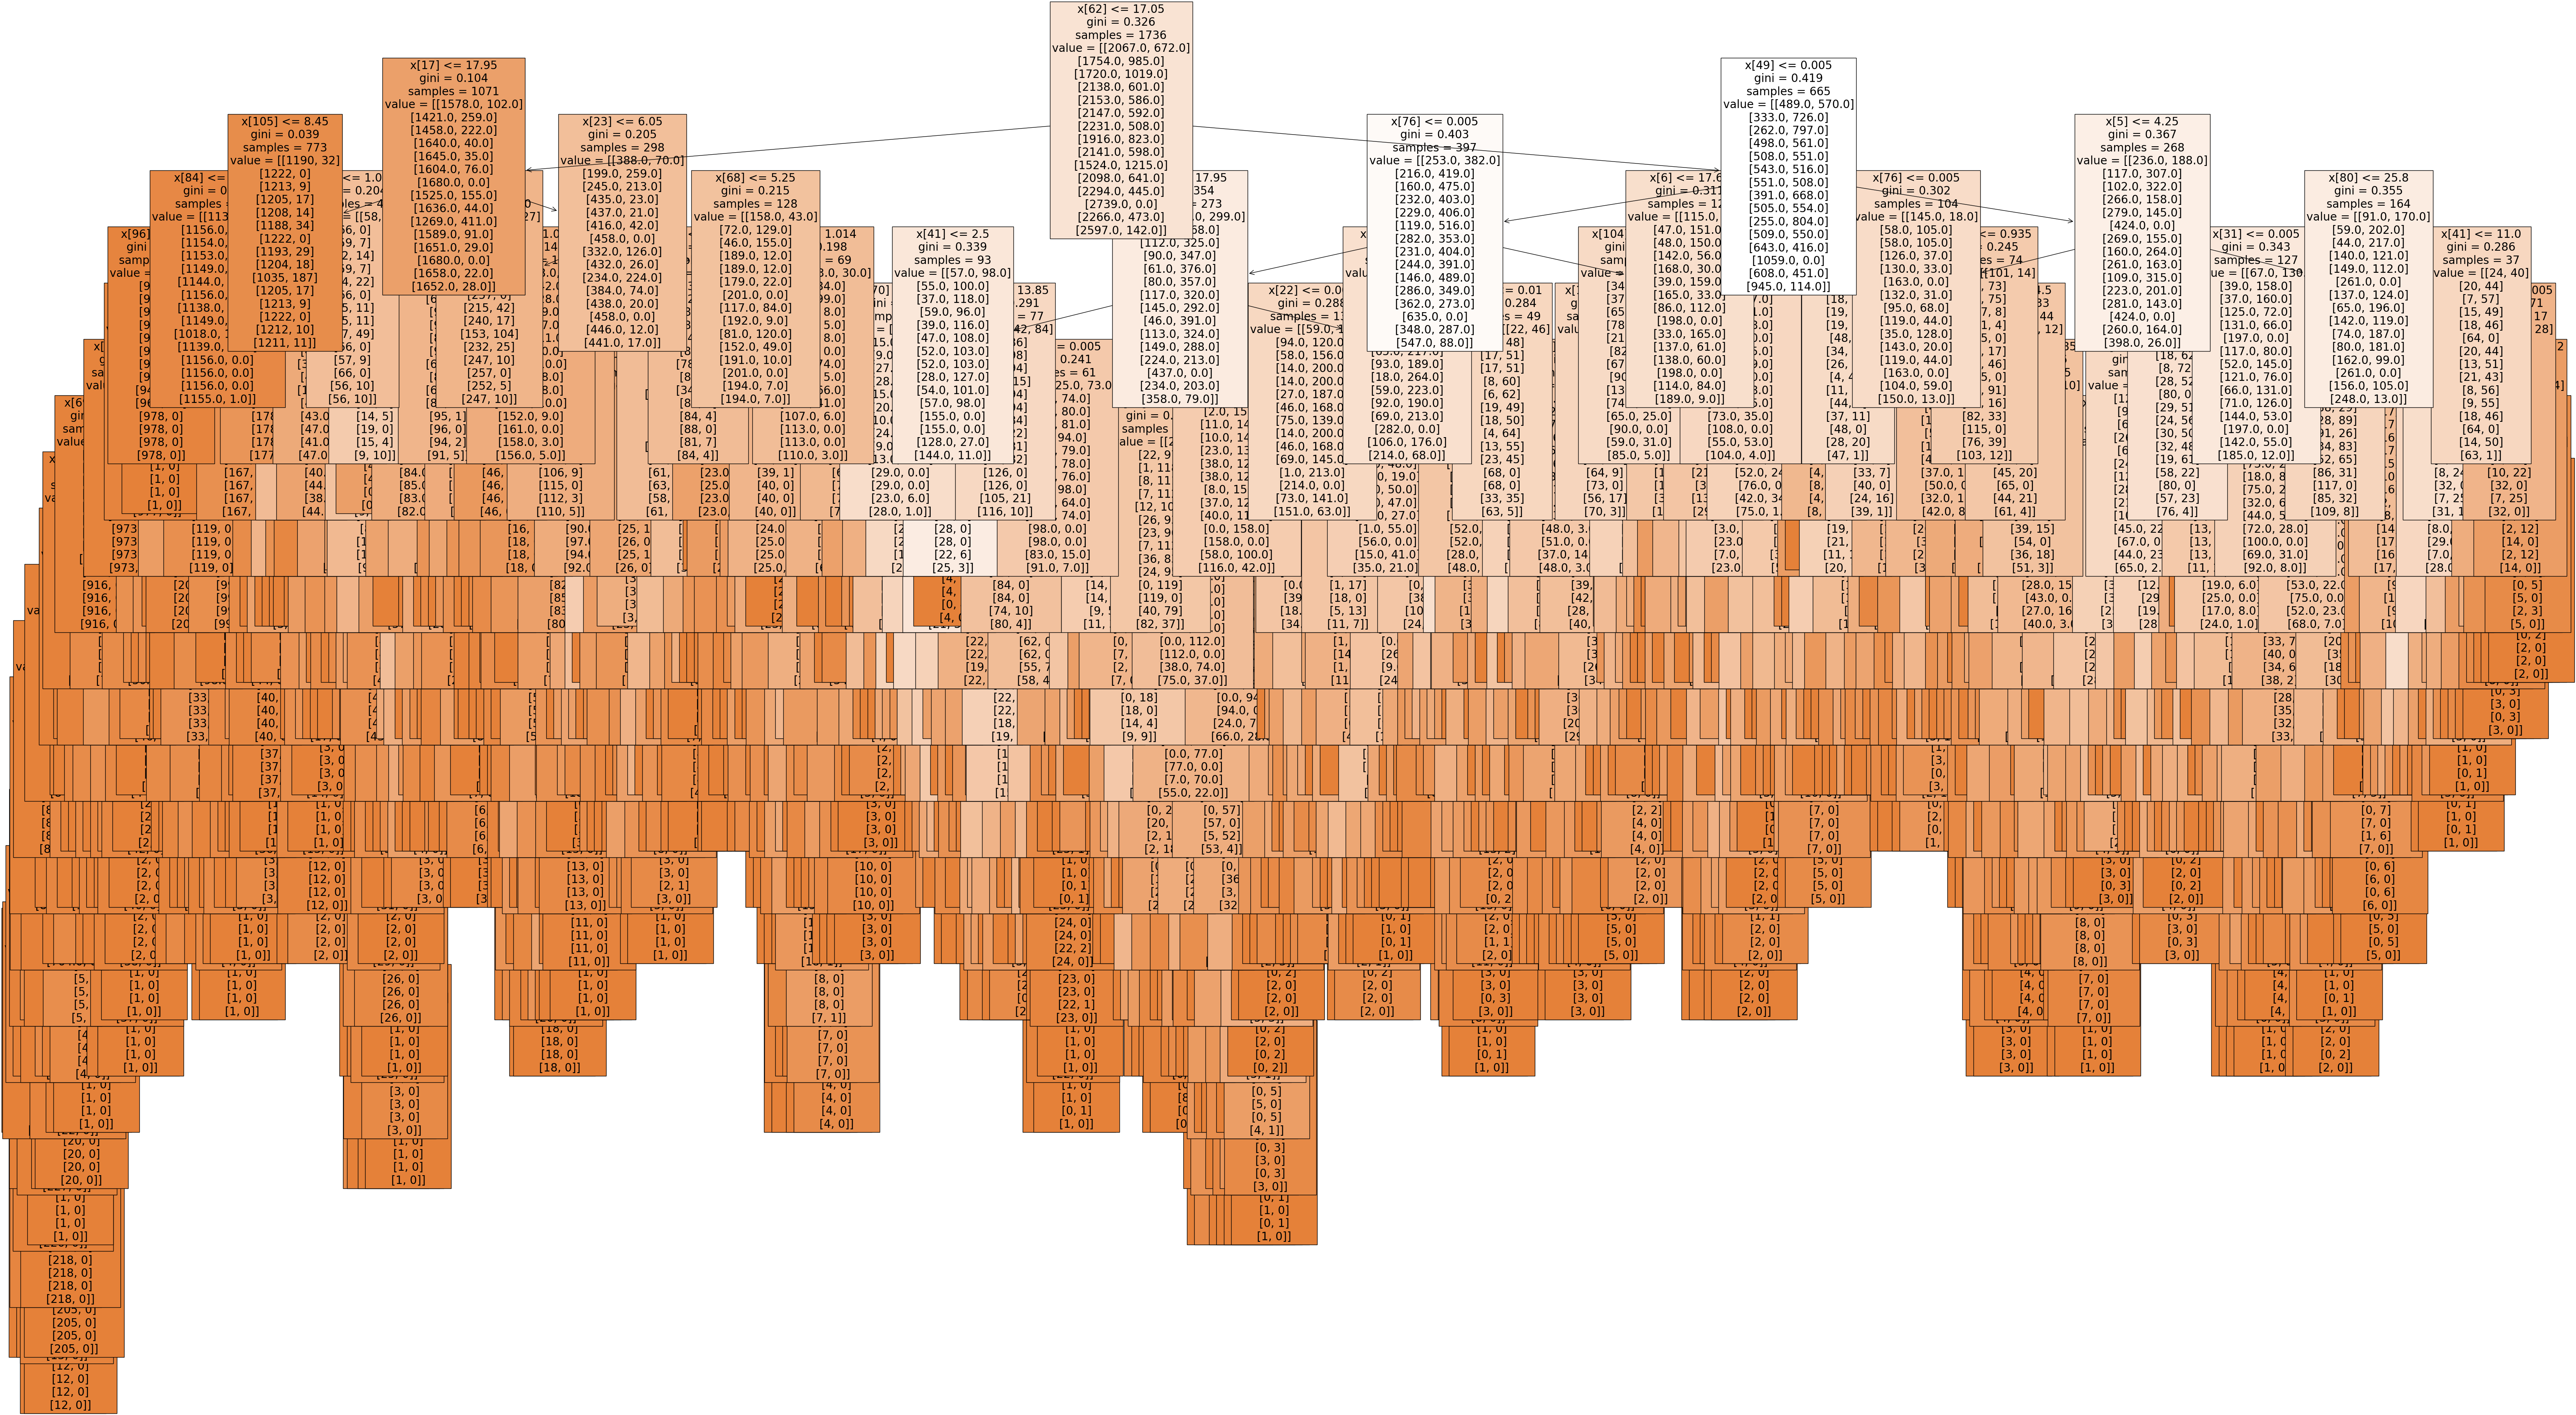

In [69]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[15], fontsize = 20, filled=True);

## 7. Feature Importance

In [74]:
newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(135,)


array([0.00248312, 0.00273801, 0.00272441, 0.00519866, 0.01633017,
       0.00780834, 0.0204853 , 0.00504891, 0.02866017, 0.0034937 ,
       0.00379258, 0.00317813, 0.00359942, 0.01411334, 0.00412446,
       0.00816735, 0.00410365, 0.00820382, 0.00283103, 0.00359257,
       0.00304459, 0.00407303, 0.01063321, 0.00431516, 0.00936817,
       0.00616394, 0.01601934, 0.00486521, 0.00219704, 0.00438896,
       0.00506296, 0.0144047 , 0.00449129, 0.012799  , 0.00250066,
       0.03108146, 0.00613883, 0.00278824, 0.00415826, 0.00552851,
       0.01921971, 0.00809745, 0.01924789, 0.00233207, 0.0389972 ,
       0.00193233, 0.00307268, 0.0037177 , 0.00340649, 0.00952748,
       0.00325889, 0.01153348, 0.00478119, 0.00590924, 0.01544495,
       0.00261455, 0.00434554, 0.00410868, 0.01465663, 0.00457475,
       0.02436004, 0.00282175, 0.02213503, 0.00365634, 0.00377112,
       0.00312529, 0.00507976, 0.01485591, 0.00443709, 0.01132114,
       0.00369446, 0.01937778, 0.00745462, 0.00292992, 0.00425

In [76]:
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[0.00248312, 0.00273801, 0.00272441, 0.00519866, 0.01633017,
         0.00780834, 0.0204853 , 0.00504891, 0.02866017],
        [0.0034937 , 0.00379258, 0.00317813, 0.00359942, 0.01411334,
         0.00412446, 0.00816735, 0.00410365, 0.00820382],
        [0.00283103, 0.00359257, 0.00304459, 0.00407303, 0.01063321,
         0.00431516, 0.00936817, 0.00616394, 0.01601934],
        [0.00486521, 0.00219704, 0.00438896, 0.00506296, 0.0144047 ,
         0.00449129, 0.012799  , 0.00250066, 0.03108146],
        [0.00613883, 0.00278824, 0.00415826, 0.00552851, 0.01921971,
         0.00809745, 0.01924789, 0.00233207, 0.0389972 ],
        [0.00193233, 0.00307268, 0.0037177 , 0.00340649, 0.00952748,
         0.00325889, 0.01153348, 0.00478119, 0.00590924],
        [0.01544495, 0.00261455, 0.00434554, 0.00410868, 0.01465663,
         0.00457475, 0.02436004, 0.00282175, 0.02213503],
        [0.00365634, 0.00377112, 0.00312529, 0.00507976, 0.01485591,
         0.00443709, 0.01132114, 0.0036944

In [78]:
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.09147709, 0.05277645, 0.06004103, 0.08179129, 0.10650816,
       0.04713948, 0.09506192, 0.06931889, 0.09345901, 0.05881771,
       0.07775798, 0.05555285, 0.02661824, 0.05477129, 0.02890862])

In [80]:
important = pd.Series(sumarray, index = stations_list)
important = important.sort_values(ascending = False)
important

DUSSELDORF    0.106508
STOCKHOLM     0.095062
MUNCHENB      0.093459
BASEL         0.091477
LJUBLJANA     0.081791
VALENTIA      0.077758
BELGRADE      0.069319
DEBILT        0.060041
HEATHROW      0.058818
KASSEL        0.055553
MADRID        0.054771
BUDAPEST      0.052776
OSLO          0.047139
MAASTRICHT    0.028909
SONNBLICK     0.026618
dtype: float64

In [84]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Weather Station': stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['BASEL', 'BUDAPEST', 'DEBILT', 'LJUBLJANA', 'DUSSELDORF', 'OSLO', 'STOCKHOLM', 'BELGRADE', 'MUNCHENB', 'HEATHROW', 'VALENTIA', 'KASSEL', 'SONNBLICK', 'MADRID', 'MAASTRICHT']


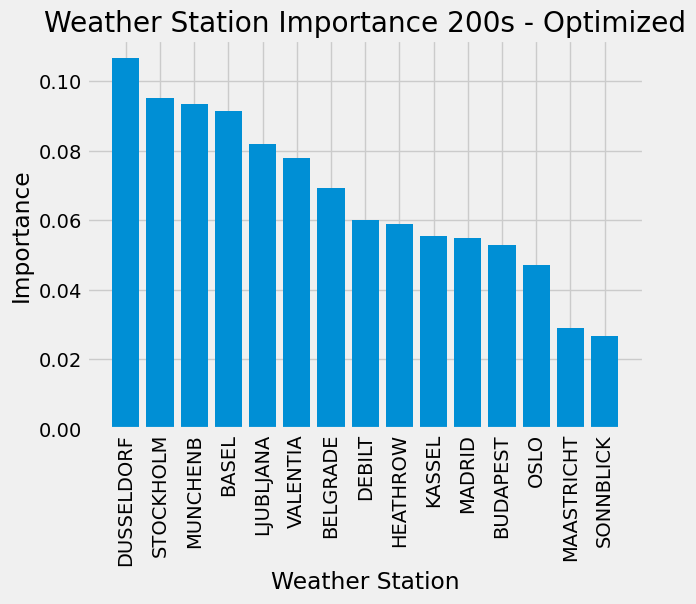

In [86]:
%matplotlib inline

plt.style.use('fivethirtyeight')
print(stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 200s - Optimized')

plt.show()

## 8. Dusseldorf

In [91]:
# Filter weather dataset to only include Dusseldorf
df_duss = df[df.columns[df.columns.astype(str).str.startswith('DUSSELDORF')]]
df_duss.head()

DUSSELDORF_cloud_cover  DUSSELDORF_humidity  DUSSELDORF_pressure  \
0                       8                 0.83               1.0161   
1                       8                 0.89               1.0161   
2                       7                 0.95               1.0161   
3                       8                 0.86               1.0161   
4                       7                 0.92               1.0161   

   DUSSELDORF_global_radiation  DUSSELDORF_precipitation  DUSSELDORF_sunshine  \
0                         0.12                      0.08                  0.0   
1                         0.18                      0.66                  0.5   
2                         0.12                      0.07                  0.0   
3                         0.12                      0.02                  0.0   
4                         0.12                      0.62                  0.0   

   DUSSELDORF_temp_mean  DUSSELDORF_temp_min  DUSSELDORF_temp_max  
0                  10.0                  7.0                 11.5  
1                   8.2                  7.4                 11.0  
2                   7.1                  6.9                  9.1  
3                   6.8                  3.6                  8.0  
4                   7.7                  6.2                 11.0

In [95]:
# Filter pleasant dataset to only include Dusseldorf
pleasant_duss = pleasant[pleasant.columns[pleasant.columns.astype(str).str.startswith('DUSSELDORF')]]
pleasant_duss

DUSSELDORF_pleasant_weather
0                                0
1                                0
2                                0
3                                0
4                                0
...                            ...
22945                            0
22946                            0
22947                            0
22948                            0
22949                            0

[22950 rows x 1 columns]

In [99]:
print(df_duss.shape)
print(pleasant_duss.shape)

(22950, 9)
(22950, 1)


In [101]:
pleasant_duss = pleasant_duss['DUSSELDORF_pleasant_weather']

In [103]:
print(pleasant_duss.shape)

(22950,)


#### · Reshape

In [107]:
X2 = df_duss
y2 = pleasant_duss

In [109]:
X2 = np.array(X2)
y2 = np.array(y2)

In [111]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,random_state = 42)

In [113]:
print(X2_train.shape, y2_train.shape)
print(X2_test.shape, y2_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


### Grid search

In [116]:
# Create a RF classifier

clf4 = RandomForestClassifier()

In [118]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [124]:
start = time.time()
grid = GridSearchCV(clf4, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X2_train, y2_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


C:\Users\Nuria Miquel\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Nuria Miquel\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nuria Miquel\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Nuria Miquel\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Nu

Search took 2.7530399163564048 minutes


In [126]:
start = time.time()
rf_random = RandomizedSearchCV(clf4, rs_space, n_iter=100, scoring='accuracy', verbose=3, n_jobs=-1, cv=5)
model_random = rf_random.fit(X2_train, y2_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Search took 4.16911551952362 minutes


In [128]:
# Grid search results vs.

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 1.0
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 30, 'max_features': 50, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 225}
Best RANDOM search score is: 1.0


In [132]:
# Create a RF classifier with the RANDOM search results
clf5 = RandomForestClassifier(n_estimators = 200, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=2, criterion = 'gini')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf5.fit(X2_train, y2_train)

RandomForestClassifier(max_depth=3, max_features=7, n_estimators=200)

In [136]:
# performing predictions on the test dataset
y2_pred = clf5.predict(X2_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y2_test, y2_pred))

Model Accuracy:  1.0


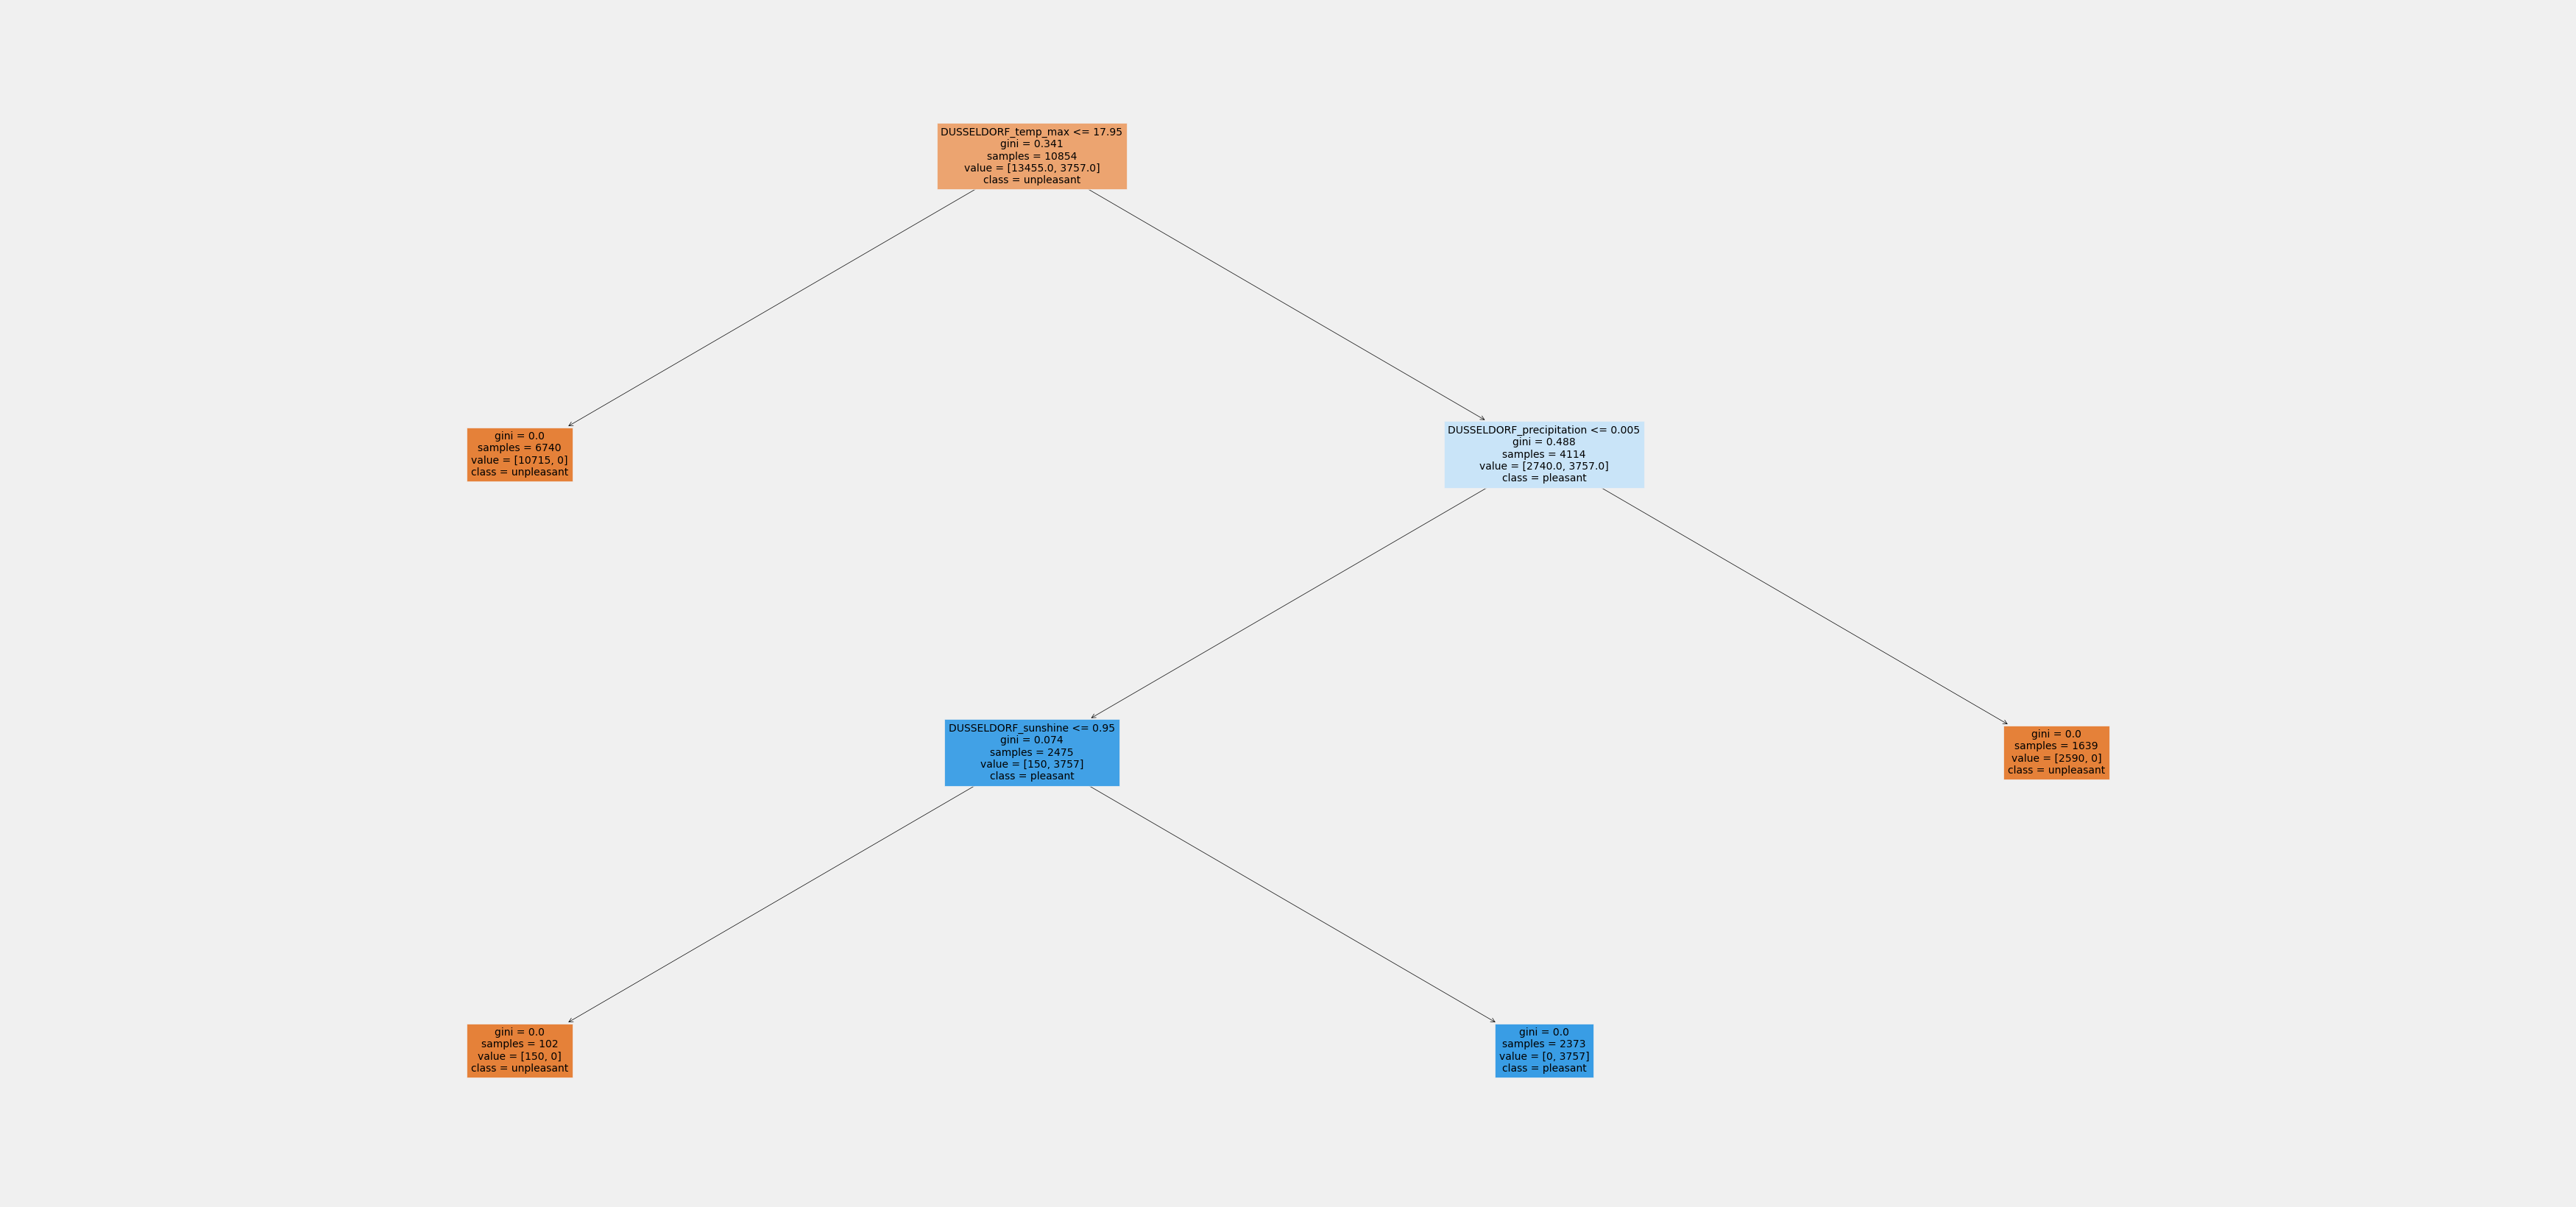

In [138]:
# Plot a tree from the selected random forest
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(40,20))
plot_tree(clf5.estimators_[6], fontsize = 10, feature_names = df_duss.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

### Feature Importances

In [148]:
# Create a list for the measurements
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation', 
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [144]:
importances_2 = clf5.feature_importances_
print(clf5.feature_importances_.shape)
importances_2

(9,)


array([0.02858345, 0.00061547, 0.00110606, 0.02269228, 0.44432557,
       0.04380403, 0.07551974, 0.0007173 , 0.38263611])

In [150]:
# Create a dataframe to associate observation measurements with their importances
importances_df2 = pd.DataFrame({
    'Measurement': measurements,
    'Importance': importances_2
})

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


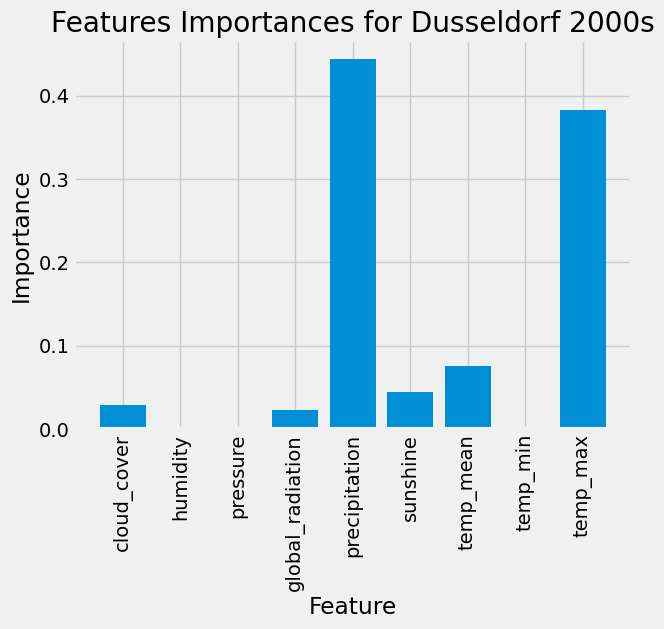

In [152]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x2_values = list(range(len(importances_2)))
print(measurements)

plt.bar(x2_values, importances_2, orientation = 'vertical')
plt.xticks(x2_values, measurements, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Dusseldorf 2000s');